# Sınıflandırma Problemleri

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Lojistik Regresyon 

## Model 

In [2]:
titanic = pd.read_csv("../input/titanicdataset-traincsv/train.csv")
df = titanic.copy()
df = df.dropna()
df.head()

PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [4]:
df["Survived"].value_counts()

1    123
0     60
Name: Survived, dtype: int64

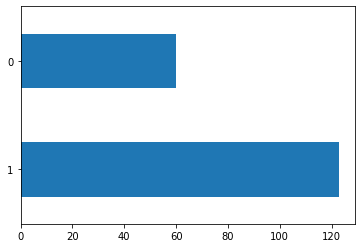

In [5]:
df["Survived"].value_counts().plot.barh();

In [6]:
df.describe().T

count        mean         std   min    25%    50%    75%  \
PassengerId  183.0  455.366120  247.052476  2.00  263.5  457.0  676.0   
Survived     183.0    0.672131    0.470725  0.00    0.0    1.0    1.0   
Pclass       183.0    1.191257    0.515187  1.00    1.0    1.0    1.0   
Age          183.0   35.674426   15.643866  0.92   24.0   36.0   47.5   
SibSp        183.0    0.464481    0.644159  0.00    0.0    0.0    1.0   
Parch        183.0    0.475410    0.754617  0.00    0.0    0.0    1.0   
Fare         183.0   78.682469   76.347843  0.00   29.7   57.0   90.0   

                  max  
PassengerId  890.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          3.0000  
Parch          4.0000  
Fare         512.3292

In [7]:
print(df.Cabin.value_counts(dropna=False).to_frame())
print(df.Embarked.value_counts(dropna=False).to_frame())

             Cabin
G6               4
B96 B98          4
C23 C25 C27      4
F33              3
D                3
...            ...
C91              1
C124             1
C32              1
E34              1
C148             1

[133 rows x 1 columns]
   Embarked
S       116
C        65
Q         2


In [8]:
print(df.Name.value_counts(dropna=False).to_frame())
print(df.Ticket.value_counts(dropna=False).to_frame())

                                                    Name
Cumings, Mrs. John Bradley (Florence Briggs Tha...     1
Appleton, Mrs. Edward Dale (Charlotte Lamson)          1
Silvey, Mrs. William Baird (Alice Munger)              1
Thayer, Mrs. John Borland (Marian Longstreth Mo...     1
Ross, Mr. John Hugo                                    1
...                                                  ...
Ball, Mrs. (Ada E Hall)                                1
Hippach, Miss. Jean Gertrude                           1
Partner, Mr. Austen                                    1
Graham, Mr. George Edward                              1
Behr, Mr. Karl Howell                                  1

[183 rows x 1 columns]
          Ticket
113760         4
19950          4
PC 17582       3
35273          3
24160          3
...          ...
113784         1
113043         1
28551          1
36928          1
111369         1

[127 rows x 1 columns]


In [9]:
dummies = pd.get_dummies(df['Sex']).rename(columns=lambda x: 'Sex_' + str(x))
df = pd.concat([df, dummies], axis=1)
df = df.drop(['Sex'],axis=1)


In [10]:
dummies = pd.get_dummies(df['Embarked']).rename(columns=lambda x: 'Embarked_' + str(x))
df = pd.concat([df, dummies], axis=1)
df = df.drop(['Embarked'],axis=1)

In [11]:
df

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name   Age  SibSp  Parch  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
6                              McCarthy, Mr. Timothy J  54.0      0      0   
10                     Sandstrom, Miss. Marguerite Rut   4.0      1      1   
11                            Bonnell, Miss. Elizabeth  58.0      0      0   
..                                                 ...   ...    ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  47.0      1      1   
872                           Carlsson, Mr. Frans Olof  33.0      0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  56.0      0      1   
887                       Graham, Miss. Margaret Edith  19.0      0      0   
889                              Behr, Mr. Karl Howell  26.0      0      0   

       Ticket     Fare        Cabin  Sex_female  Sex_male  Embarked_C  \
1    PC 17599  71.2833          C85           1         0           1   
3      113803  53.1000         C123           1         0           0   
6       17463  51.8625          E46           0         1           0   
10    PP 9549  16.7000           G6           1         0           0   
11     113783  26.5500         C103           1         0           0   
..        ...      ...          ...         ...       ...         ...   
871     11751  52.5542          D35           1         0           0   
872       695   5.0000  B51 B53 B55           0         1           0   
879     11767  83.1583          C50           1         0           1   
887    112053  30.0000          B42           1         0           0   
889    111369  30.0000         C148           0         1           1   

     Embarked_Q  Embarked_S  
1             0           0  
3             0           1  
6             0           1  
10            0           1  
11            0           1  
..          ...         ...  
871           0           1  
872           0           1  
879           0           0  
887           0           1  
889           0           0  

[183 rows x 15 columns]

In [12]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [13]:
y = df["Survived"]
X = df.drop(["Survived","Name","Ticket","Cabin","Sex_male","Embarked_S"], axis=1)
X

PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_female  Embarked_C  \
1              2       1  38.0      1      0  71.2833           1           1   
3              4       1  35.0      1      0  53.1000           1           0   
6              7       1  54.0      0      0  51.8625           0           0   
10            11       3   4.0      1      1  16.7000           1           0   
11            12       1  58.0      0      0  26.5500           1           0   
..           ...     ...   ...    ...    ...      ...         ...         ...   
871          872       1  47.0      1      1  52.5542           1           0   
872          873       1  33.0      0      0   5.0000           0           0   
879          880       1  56.0      0      1  83.1583           1           1   
887          888       1  19.0      0      0  30.0000           1           0   
889          890       1  26.0      0      0  30.0000           0           1   

     Embarked_Q  
1             0  
3             0  
6             0  
10            0  
11            0  
..          ...  
871           0  
872           0  
879           0  
887           0  
889           0  

[183 rows x 9 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Age          183 non-null    float64
 5   SibSp        183 non-null    int64  
 6   Parch        183 non-null    int64  
 7   Ticket       183 non-null    object 
 8   Fare         183 non-null    float64
 9   Cabin        183 non-null    object 
 10  Sex_female   183 non-null    uint8  
 11  Sex_male     183 non-null    uint8  
 12  Embarked_C   183 non-null    uint8  
 13  Embarked_Q   183 non-null    uint8  
 14  Embarked_S   183 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(5)
memory usage: 16.6+ KB


In [15]:
#statsmodels

In [16]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.430151
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  183
Model:                          Logit   Df Residuals:                      174
Method:                           MLE   Df Model:                            8
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.3201
Time:                        23:36:48   Log-Likelihood:                -78.718
converged:                       True   LL-Null:                       -115.78
Covariance Type:            nonrobust   LLR p-value:                 7.407e-13
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
PassengerId     0.0020      0.001      2.543      0.011       0.000       0.003
Pclass         -0.2662      0.292     -0.911      0.362      -0.838       0.306
Age            -0.0312      0.010     -3.064      0.002      -0.051      -0.011
SibSp           0.3597      0.346      1.039      0.299      -0.319       1.038
Parch          -0.3241      0.319     -1.016      0.310      -0.949       0.301
Fare            0.0017      0.003      0.545      0.586      -0.004       0.008
Sex_female      2.9397      0.498      5.907      0.000       1.964       3.915
Embarked_C      0.4760      0.447      1.066      0.286      -0.399       1.351
Embarked_Q     -1.3375      1.977     -0.676      0.499      -5.213       2.538
===============================================================================
"""

In [17]:
#scikit-learn

In [18]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [19]:
loj_model.intercept_

array([0.47275497])

In [20]:
loj_model.coef_

array([[ 1.71532448e-03, -3.07032074e-01, -3.44344149e-02,
         2.33154816e-01, -2.88461398e-01,  1.72245204e-03,
         2.39463123e+00,  3.81802266e-01, -2.37578356e-01]])

## Tahmin & Model Tuning

In [21]:
y_pred = loj_model.predict(X)

In [22]:
confusion_matrix(y, y_pred)

array([[ 35,  25],
       [ 18, 105]])

In [23]:
accuracy_score(y, y_pred)

0.7650273224043715

In [24]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62        60
           1       0.81      0.85      0.83       123

    accuracy                           0.77       183
   macro avg       0.73      0.72      0.72       183
weighted avg       0.76      0.77      0.76       183



In [25]:
loj_model.predict(X)[0:10]

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [26]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.11993813, 0.88006187],
       [0.15621982, 0.84378018],
       [0.83095316, 0.16904684],
       [0.14174407, 0.85825593],
       [0.34763003, 0.65236997],
       [0.77763728, 0.22236272],
       [0.66732827, 0.33267173],
       [0.46629006, 0.53370994],
       [0.15302117, 0.84697883],
       [0.8554589 , 0.1445411 ]])

In [27]:
y[0:10]

1     1
3     1
6     0
10    1
11    1
21    1
23    1
27    0
52    1
54    0
Name: Survived, dtype: int64

In [28]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [29]:
y_probs[0:10]

array([0.88006187, 0.84378018, 0.16904684, 0.85825593, 0.65236997,
       0.22236272, 0.33267173, 0.53370994, 0.84697883, 0.1445411 ])

In [30]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [31]:
y_pred[0:10]

[1, 1, 0, 1, 1, 0, 0, 1, 1, 0]

In [32]:
confusion_matrix(y, y_pred)

array([[ 35,  25],
       [ 18, 105]])

In [33]:
accuracy_score(y, y_pred)

0.7650273224043715

In [34]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62        60
           1       0.81      0.85      0.83       123

    accuracy                           0.77       183
   macro avg       0.73      0.72      0.72       183
weighted avg       0.76      0.77      0.76       183



In [35]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.88006187, 0.84378018, 0.16904684, 0.85825593, 0.65236997])

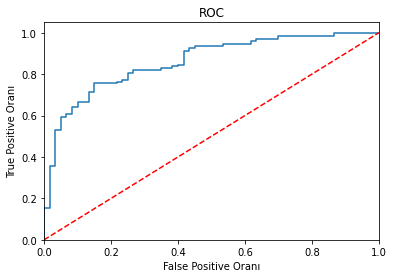

In [36]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [38]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [39]:
accuracy_score(y_test, loj_model.predict(X_test))

0.6909090909090909

In [40]:
cross_val_score(loj_model, X_test, y_test, cv = 10)

array([0.66666667, 0.66666667, 0.66666667, 1.        , 1.        ,
       0.8       , 0.8       , 0.6       , 0.8       , 1.        ])

In [41]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.8

# Gaussian Naive Bayes

In [42]:
#df = diabetes.copy()
#df = df.dropna()
#y = df["Survived"]
#X = df.drop(['Survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [45]:
nb_model.predict(X_test)[0:10]

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [46]:
nb_model.predict_proba(X_test)[0:10]

array([[4.24363308e-02, 9.57563669e-01],
       [1.78880590e-01, 8.21119410e-01],
       [2.80158880e-04, 9.99719841e-01],
       [3.82803891e-01, 6.17196109e-01],
       [6.80112684e-01, 3.19887316e-01],
       [7.24988620e-01, 2.75011380e-01],
       [3.13420426e-01, 6.86579574e-01],
       [1.68112254e-03, 9.98318877e-01],
       [6.86466317e-03, 9.93135337e-01],
       [7.42842601e-01, 2.57157399e-01]])

In [47]:
y_pred = nb_model.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred)

0.6909090909090909

In [49]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.7433333333333334

# KNN

## Model & Tahmin

In [50]:
#df = diabetes.copy()
#df = df.dropna()
#y = df["Outcome"]
#X = df.drop(['Outcome'], axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    #test_size=0.30, 
                                                    #random_state=42)

In [51]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [52]:
y_pred = knn_model.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.6181818181818182

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.30      0.36        20
           1       0.67      0.80      0.73        35

    accuracy                           0.62        55
   macro avg       0.56      0.55      0.55        55
weighted avg       0.59      0.62      0.60        55



## Model Tuning

In [55]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [56]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [57]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.6955128205128205
En iyi parametreler: {'n_neighbors': 11}


In [58]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [59]:
knn_tuned.score(X_test, y_test)

0.5818181818181818

In [60]:
y_pred = knn_tuned.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred)

0.5818181818181818

# SVC

## Model & Tahmin

In [62]:
#df = diabetes.copy()
#df = df.dropna()
#y = df["Outcome"]
#X = df.drop(['Outcome'], axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    #test_size=0.30, 
                                                    #random_state=42)

In [63]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [64]:
svm_model

SVC(kernel='linear')

In [65]:
y_pred = svm_model.predict(X_test)

In [66]:
accuracy_score(y_test, y_pred)

0.6727272727272727

## Model Tuning

In [67]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [68]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 8}


In [69]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [70]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.6909090909090909

# RBF SVC

## Model & Tahmin

In [71]:
#df = diabetes.copy()
#df = df.dropna()
#y = df["Outcome"]
#X = df.drop(['Outcome'], axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    #test_size=0.30, 
                                                    #random_state=42)

In [72]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [73]:
svc_model

SVC()

In [74]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6363636363636364

## Model Tuning

In [75]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [76]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] END ................................................C=1; total time=   1.2s
[CV] END ................................................C=1; total time=  16.5s
[CV] END ................................................C=1; total time=   3.3s
[CV] END ................................................C=1; total time=   1.6s
[CV] END ................................................C=1; total time=   8.4s
[CV] END ................................................C=2; total time=   2.9s
[CV] END ................................................C=2; total time=  13.5s
[CV] END ................................................C=2; total time=   3.5s
[CV] END ................................................C=2; total time=   3.4s
[CV] END ................................................C=2; total time=   7.3s
[CV] END ................................................C=2; total time=   5.3s
[CV] END .....................................

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [77]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [78]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [79]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.5818181818181818

# Yapay Sinir Ağları

## Model & Tahmin

In [80]:
#df = diabetes.copy()
#df = df.dropna()
#y = df["Outcome"]
#X = df.drop(['Outcome'], axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    #test_size=0.30, 
                                                    #random_state=42)

In [81]:
from sklearn.preprocessing import StandardScaler  

In [82]:
scaler = StandardScaler()

In [83]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
X_test_scaled[0:5]

array([[-1.38509277, -0.36591004, -0.78536805, -0.70947565,  0.64236902,
         1.9925216 , -1.03175391,  1.4309504 , -0.12598816],
       [-0.85807522,  3.70682776, -0.45961591,  0.80407241,  0.64236902,
        -0.86485159,  0.96922337, -0.69883624, -0.12598816],
       [ 1.08753094, -0.36591004, -0.98081934,  2.31762047,  1.90734185,
         2.17156613,  0.96922337,  1.4309504 , -0.12598816],
       [ 0.30294841, -0.36591004,  0.90854308,  0.80407241, -0.62260382,
         0.29182875, -1.03175391,  1.4309504 , -0.12598816],
       [ 0.9686548 , -0.36591004,  0.77824222,  0.80407241, -0.62260382,
        -0.36418091, -1.03175391, -0.69883624, -0.12598816]])

In [85]:
from sklearn.neural_network import MLPClassifier

In [86]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [87]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7454545454545455

## Model Tuning

In [88]:
mlpc

MLPClassifier()

In [89]:
?mlpc

In [90]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [91]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits

[CV] END ......................................C=50, gamma=1; total time=   0.0s
[CV] END ......................................C=50, gamma=1; total time=   0.0s
[CV] END ......................................C=50, gamma=1; total time=   0.0s
[CV] END ......................................C=50, gamma=1; total time=   0.0s
[CV] END ......................................C=50, gamma=1; total time=   0.0s
[CV] END ......................................C=50, gamma=1; total time=   0.0s
[CV] END ......................................C=50, gamma=1; total time=   0.0s
[CV] END ......................................C=50, gamma=5; total time=   0.0s
[CV] END ......................................C=50, gamma=5; total time=   0.0s
[CV] END ......................................C=50, gamma=5; total time=   0.0s
[CV] END ......................................C=50, gamma=5; total time=   0.0s
[CV] END ..................................

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC


[CV] END .....................................C=50, gamma=50; total time=   0.0s
[CV] END ....................................C=50, gamma=100; total time=   0.0s
[CV] END ....................................C=50, gamma=100; total time=   0.0s
[CV] END ....................................C=50, gamma=100; total time=   0.0s
[CV] END ....................................C=50, gamma=100; total time=   0.0s
[CV] END ....................................C=50, gamma=100; total time=   0.0s
[CV] END ....................................C=50, gamma=100; total time=   0.0s
[CV] END ....................................C=50, gamma=100; total time=   0.0s
[CV] END ....................................C=50, gamma=100; total time=   0.0s
[CV] END ....................................C=50, gamma=100; total time=   0.0s
[CV] END ....................................C=50, gamma=100; total time=   0.0s
[CV] END ................................C=100, gamma=0.0001; total time=   0.0s
[CV] END ..................

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC


[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.5s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.1, hidden_layer_sizes=(100, 100), solver=adam; total

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi


[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), solver=sgd; total time= 

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(100, 100), solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END 

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi


[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alp

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed 


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activat

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi


[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.005, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activatio

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activ

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.3s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi


[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=relu, alpha=1e-05, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activati

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hi

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi


[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.1, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(10, 10, 10), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(5, 3), solver=lbfgs; total time

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.3s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.5s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.4s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] E

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC


[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.02, hidden_layer_sizes=(5, 3), solver=adam; total t

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC


[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=l

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_


[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(3, 5), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.3s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.005, hidden_layer_sizes=(5, 3), solver=a

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.6s
[CV] END activa

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=adam; total time=   0.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(5, 3), solver

GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [92]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (3, 5), 'solver': 'adam'}


In [93]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [94]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100))

In [95]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.6909090909090909

# CART

## Model & Tahmin

In [96]:
#df = diabetes.copy()
#df = df.dropna()
#y = df["Outcome"]
#X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [99]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [100]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6545454545454545

## Model Tuning

In [101]:
cart_model

DecisionTreeClassifier()

In [102]:
?cart_model

In [103]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [104]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits

[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=adam; total time=   0.0s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100, 100), solver=sgd; total time=   0.1s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(100, 100), solver=lbfgs; total time=   0.9s
[CV] END activation=logistic, alpha=1e-05, hidden_layer_siz

In [105]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 1, 'min_samples_split': 2}


In [106]:
#final

In [107]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [108]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7454545454545455

# Random Forests

In [109]:
#df = diabetes.copy()
#df = df.dropna()
#y = df["Outcome"]
#X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
#X = pd.DataFrame(X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    #test_size=0.30, 
                                                    #random_state=42)

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [112]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [113]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7090909090909091

## Model Tuning

In [114]:
rf_model

RandomForestClassifier()

In [115]:
?rf_model

In [116]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [117]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [118]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits

[CV] END ..................max_depth=9, min_samples_split=26; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=26; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=26; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=27; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=27; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=30; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=30; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=30; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=30; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=30; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=30; total time=   0.0s
[CV] END ..................max_depth=9, min

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [119]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 10}


In [120]:
#final

In [121]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=10,
                       n_estimators=1000)

In [122]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.6727272727272727

In [123]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

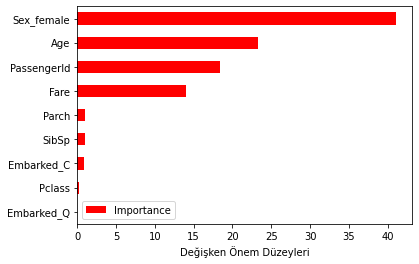

In [124]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

In [125]:
#df = diabetes.copy()
#df = df.dropna()
#y = df["Outcome"]
#X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
#X = pd.DataFrame(X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    #test_size=0.30, 
                                                    #random_state=42)

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

In [127]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [128]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

## Model Tuning

In [129]:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [130]:
?gbm_model

In [131]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,1000],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [132]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [133]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits

[CV] END max_depth=10, max_features=5, min_samples_split=10, n_estimators=1000; total time=   2.2s
[CV] END max_depth=10, max_features=5, min_samples_split=10, n_estimators=1000; total time=   2.1s
[CV] END max_depth=10, max_features=5, min_samples_split=10, n_estimators=1000; total time=   2.4s
[CV] END max_depth=10, max_features=8, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=8, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=8, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=10, max_features=8, min_samples_split=2, n_estimators=500; total time=   1.1s
[CV] END max_depth=10, max_features=8, min_samples_split=2, n_estimators=500; total time=   1.1s
[CV] END max_depth=10, max_features=8, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=10, max_features=8, min_samples_split=

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [134]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 1000}


In [135]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 500)

In [136]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [137]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7454545454545455

# XGBoost

In [138]:
#df = diabetes.copy()
#df = df.dropna()
#y = df["Outcome"]
#X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
#X = pd.DataFrame(X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    #test_size=0.30, 
                                                    #random_state=42)

In [139]:
#!pip install xgboost
from xgboost import XGBClassifier

In [140]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [141]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [142]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6545454545454545

## Model Tuning

In [143]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [144]:
?xgb_model

In [145]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [146]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [147]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000; total time=   1.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000; total time=   1.3s
[CV] END learning_rate=0.05, max

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [148]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 1000,
 'subsample': 0.6}

In [149]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [150]:
xgb_tuned =  xgb.fit(X_train,y_train)

[00:29:28] WARNING: ../src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [151]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.6363636363636364

# LightGBM

In [152]:
#df = diabetes.copy()
#df = df.dropna()
#y = df["Outcome"]
#X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
#X = pd.DataFrame(X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    #test_size=0.30, 
                                                    #random_state=42)

In [153]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [154]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [155]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6909090909090909

In [156]:
## Model Tuning

In [157]:
lgbm_model

LGBMClassifier()

In [158]:
?lgbm_model

In [159]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [160]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [161]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s
[00:29:16] WARNING: ../src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s
[00:29:17] WARNING: ../src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an 

GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [162]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 100,
 'subsample': 0.6}

In [163]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [164]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [165]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.6727272727272727

# CatBoost

## Model & Tahmin

In [166]:
#df = diabetes.copy()
#df = df.dropna()
#y = df["Outcome"]
#X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
#X = pd.DataFrame(X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    #test_size=0.30, 
                                                    #random_state=42)

In [167]:
#!pip install catboost
from catboost import CatBoostClassifier

In [168]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.004283
0:	learn: 0.6893613	total: 52.7ms	remaining: 52.6s
1:	learn: 0.6863304	total: 53.4ms	remaining: 26.6s
2:	learn: 0.6836513	total: 54ms	remaining: 17.9s
3:	learn: 0.6809403	total: 54.5ms	remaining: 13.6s
4:	learn: 0.6775031	total: 55ms	remaining: 10.9s
5:	learn: 0.6746200	total: 55.5ms	remaining: 9.2s
6:	learn: 0.6714791	total: 56ms	remaining: 7.94s
7:	learn: 0.6689669	total: 56.2ms	remaining: 6.97s
8:	learn: 0.6656591	total: 56.6ms	remaining: 6.24s
9:	learn: 0.6626935	total: 57.1ms	remaining: 5.65s
10:	learn: 0.6594349	total: 57.6ms	remaining: 5.17s
11:	learn: 0.6570610	total: 57.8ms	remaining: 4.76s
12:	learn: 0.6534607	total: 58.2ms	remaining: 4.42s
13:	learn: 0.6508821	total: 58.6ms	remaining: 4.13s
14:	learn: 0.6485616	total: 58.8ms	remaining: 3.86s
15:	learn: 0.6459697	total: 59ms	remaining: 3.63s
16:	learn: 0.6430596	total: 59.4ms	remaining: 3.43s
17:	learn: 0.6399719	total: 59.9ms	remaining: 3.27s
18:	learn: 0.6369790	total: 60.3ms	remaining: 3.11s
1

In [169]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7454545454545455

## Model Tuning

In [170]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [171]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits

[CV] END learning_rate=0.05, max_depth=6, min_child_samples=20, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_child_samples=20, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_child_samples=20, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_child_samples=20, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_child_samples=20, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_child_samples=20, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_child_samples=20, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_child_samples=20, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] E

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

87:	learn: 0.3932559	total: 99ms	remaining: 126ms
88:	learn: 0.3927032	total: 99.3ms	remaining: 124ms
89:	learn: 0.3907430	total: 99.6ms	remaining: 122ms
90:	learn: 0.3901860	total: 99.9ms	remaining: 120ms
91:	learn: 0.3886195	total: 100ms	remaining: 118ms
92:	learn: 0.3875516	total: 100ms	remaining: 116ms
93:	learn: 0.3868413	total: 101ms	remaining: 114ms
94:	learn: 0.3844586	total: 101ms	remaining: 112ms
95:	learn: 0.3840413	total: 101ms	remaining: 110ms
96:	learn: 0.3820032	total: 102ms	remaining: 108ms
97:	learn: 0.3805465	total: 102ms	remaining: 106ms
98:	learn: 0.3799380	total: 102ms	remaining: 104ms
99:	learn: 0.3780963	total: 102ms	remaining: 102ms
100:	learn: 0.3760952	total: 103ms	remaining: 101ms
101:	learn: 0.3737706	total: 103ms	remaining: 98.9ms
102:	learn: 0.3732791	total: 103ms	remaining: 97.2ms
103:	learn: 0.3727608	total: 103ms	remaining: 95.5ms
104:	learn: 0.3709771	total: 107ms	remaining: 96.7ms
105:	learn: 0.3704811	total: 107ms	remaining: 95.1ms
106:	learn: 0.3700

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi

0:	learn: 0.6857562	total: 46.5ms	remaining: 9.24s
1:	learn: 0.6772639	total: 46.7ms	remaining: 4.63s
2:	learn: 0.6695109	total: 47ms	remaining: 3.08s
3:	learn: 0.6633671	total: 47.2ms	remaining: 2.31s
4:	learn: 0.6568507	total: 47.5ms	remaining: 1.85s
5:	learn: 0.6500812	total: 47.7ms	remaining: 1.54s
6:	learn: 0.6447437	total: 47.9ms	remaining: 1.32s
7:	learn: 0.6380527	total: 48.2ms	remaining: 1.16s
8:	learn: 0.6324084	total: 48.4ms	remaining: 1.03s
9:	learn: 0.6263424	total: 48.6ms	remaining: 924ms
10:	learn: 0.6206646	total: 48.9ms	remaining: 840ms
11:	learn: 0.6157859	total: 49.1ms	remaining: 769ms
12:	learn: 0.6093097	total: 49.3ms	remaining: 710ms
13:	learn: 0.6040890	total: 49.6ms	remaining: 659ms
14:	learn: 0.5991311	total: 49.8ms	remaining: 615ms
15:	learn: 0.5930806	total: 50.1ms	remaining: 576ms
16:	learn: 0.5881997	total: 50.3ms	remaining: 542ms
17:	learn: 0.5832478	total: 54.9ms	remaining: 555ms
18:	learn: 0.5785965	total: 55.2ms	remaining: 526ms
19:	learn: 0.5730844	tot

{'depth': 3, 'iterations': 200, 'learning_rate': 0.05}

In [172]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.05}

In [173]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6506869	total: 573us	remaining: 114ms
1:	learn: 0.6205539	total: 1.42ms	remaining: 140ms
2:	learn: 0.5925646	total: 1.89ms	remaining: 124ms
3:	learn: 0.5661072	total: 2.32ms	remaining: 114ms
4:	learn: 0.5468182	total: 2.67ms	remaining: 104ms
5:	learn: 0.5254990	total: 3.03ms	remaining: 98ms
6:	learn: 0.5101714	total: 3.43ms	remaining: 94.6ms
7:	learn: 0.4951085	total: 3.85ms	remaining: 92.3ms
8:	learn: 0.4761822	total: 4.24ms	remaining: 90.1ms
9:	learn: 0.4648185	total: 4.63ms	remaining: 88.1ms
10:	learn: 0.4538808	total: 4.96ms	remaining: 85.3ms
11:	learn: 0.4380491	total: 5.37ms	remaining: 84.1ms
12:	learn: 0.4283695	total: 5.77ms	remaining: 83ms
13:	learn: 0.4185625	total: 6.18ms	remaining: 82.1ms
14:	learn: 0.4114141	total: 6.59ms	remaining: 81.3ms
15:	learn: 0.4039045	total: 6.99ms	remaining: 80.4ms
16:	learn: 0.3947434	total: 7.45ms	remaining: 80.2ms
17:	learn: 0.3871224	total: 7.89ms	remaining: 79.8ms
18:	learn: 0.3810720	total: 8.34ms	remaining: 79.4ms
19:	learn: 0.

In [174]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

# Tüm Modellerin Karşılaştırılması

In [175]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 58.1818%
----------------------------
LogisticRegression:
Accuracy: 69.0909%
----------------------------
SVC:
Accuracy: 58.1818%
----------------------------
GaussianNB:
Accuracy: 69.0909%
----------------------------
MLPClassifier:
Accuracy: 69.0909%
----------------------------
DecisionTreeClassifier:
Accuracy: 74.5455%
----------------------------
RandomForestClassifier:
Accuracy: 67.2727%
----------------------------
GradientBoostingClassifier:
Accuracy: 74.5455%
----------------------------
CatBoostClassifier:
Accuracy: 72.7273%
----------------------------
LGBMClassifier:
Accuracy: 67.2727%
----------------------------
XGBClassifier:
Accuracy: 63.6364%


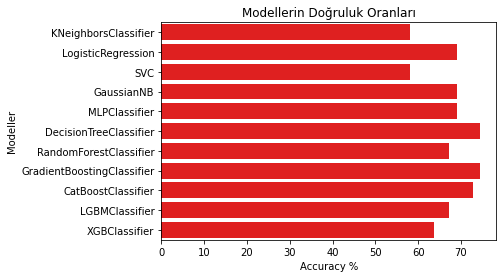

In [176]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    